In [1]:
import os
import pandas as pd

In [2]:
path = "/media/devson/New Volume/DeveloperWorld/Learning/MachineLearning/UsedCarPricePrediction/Dataset/"

In [3]:
import os
print(os.getcwd())

print(os.listdir(os.getcwd()))

/media/devson/New Volume/DeveloperWorld/Learning/MachineLearning/UsedCarPricePrediction
['.ipynb_checkpoints', 'Dataset', 'DataVisualization.ipynb', 'PredictingSomeAccuracy.ipynb', 'report.html']


In [18]:
df = pd.read_csv(os.path.join(path,"vehicles.csv"))

In [19]:
df.shape

(458213, 26)

In [20]:
df.head()

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,...,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,...,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,...,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.0,chevrolet,c-10,good,...,rwd,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.0,ford,f350 lariat,excellent,...,4wd,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458213 entries, 0 to 458212
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    458213 non-null  int64  
 1   id            458213 non-null  int64  
 2   url           458213 non-null  object 
 3   region        458213 non-null  object 
 4   region_url    458213 non-null  object 
 5   price         458213 non-null  int64  
 6   year          457163 non-null  float64
 7   manufacturer  439993 non-null  object 
 8   model         453367 non-null  object 
 9   condition     265273 non-null  object 
 10  cylinders     287073 non-null  object 
 11  fuel          454976 non-null  object 
 12  odometer      402910 non-null  float64
 13  title_status  455636 non-null  object 
 14  transmission  455771 non-null  object 
 15  VIN           270664 non-null  object 
 16  drive         324025 non-null  object 
 17  size          136865 non-null  object 
 18  type

In [22]:
## Dropping all the unnecessary columns

xcolumns = ["region_url","url","VIN","image_url","lat","long","posting_date"]

In [23]:
df = df.drop(columns = xcolumns)

In [24]:
df.shape

(458213, 19)

In [25]:
## Before making changes on original data making dummy data

dfx = df.copy()

# Exploring some features and Datasets

In [26]:
dfx.isnull().sum()

Unnamed: 0           0
id                   0
region               0
price                0
year              1050
manufacturer     18220
model             4846
condition       192940
cylinders       171140
fuel              3237
odometer         55303
title_status      2577
transmission      2442
drive           134188
size            321348
type            112738
paint_color     140843
description         70
state                0
dtype: int64

## Filling missing values for Numerical Datas

- Year
- Odometer


### Year

Since, Year is the categorical Numerical Variable, we are using 'Mode' method to fill the missing value

### Odometer

Odometer is the continous value, so we are using mean method to fill the missing values

In [27]:
dfx["year"].fillna(dfx["year"].mode()[0], inplace=True)
dfx["odometer"].fillna(dfx["odometer"].mean(), inplace = True)


In [28]:
dfx.isnull().sum()

Unnamed: 0           0
id                   0
region               0
price                0
year                 0
manufacturer     18220
model             4846
condition       192940
cylinders       171140
fuel              3237
odometer             0
title_status      2577
transmission      2442
drive           134188
size            321348
type            112738
paint_color     140843
description         70
state                0
dtype: int64

## Filling Missing data for Categorical Datas
- manufacturer
- model
- condition
- cylinders
- fuel
- title_status
- transmission
- drive
- size
- type
- paint_color


#### ----------------------------- Manufacturer -----------------------------

In [29]:
dfx['manufacturer'].value_counts()

ford               79666
chevrolet          64977
toyota             38577
honda              25868
nissan             23654
jeep               21165
ram                17697
gmc                17267
dodge              16730
bmw                12352
hyundai            10975
mercedes-benz      10628
subaru             10510
volkswagen         10489
kia                 8854
chrysler            7499
lexus               7119
cadillac            6743
buick               6009
mazda               5931
audi                5583
acura               4008
infiniti            3714
lincoln             3338
pontiac             3037
volvo               2866
mini                2330
mitsubishi          2301
porsche             1779
rover               1662
mercury             1645
saturn              1393
tesla               1067
jaguar              1060
fiat                 955
alfa-romeo           187
harley-davidson      139
ferrari               96
datsun                63
aston-martin          35


In [30]:
dfx['manufacturer'].isnull().sum()

18220

In [31]:
dfx['manufacturer'].fillna(df['manufacturer'].mode()[0], inplace = True)

In [32]:
dfx['manufacturer'].isnull().sum()

0

#### -------------------------------- Model --------------------------------

In [33]:
dfx['model'].fillna(dfx['model'].mode()[0], inplace = True)

In [34]:
dfx['model'].isnull().sum()

0

#### ----------------------------- Condition -----------------------------

In [35]:
dfx['condition'].value_counts()

good         115685
excellent    115206
like new      24553
fair           7740
new            1428
salvage         661
Name: condition, dtype: int64

In [36]:
dfx['condition'].fillna(dfx['condition'].mode()[0], inplace = True)

In [37]:
dfx['condition'].isnull().sum()

0

#### ----------------------------- Cylinders -----------------------------

In [38]:
dfx['cylinders'].value_counts()

6 cylinders     105677
4 cylinders      94767
8 cylinders      81179
5 cylinders       2058
10 cylinders      1543
other             1112
3 cylinders        550
12 cylinders       187
Name: cylinders, dtype: int64

In [39]:
dfx['cylinders'].fillna(dfx['cylinders'].mode()[0], inplace = True)

In [40]:
dfx['cylinders'].isnull().sum()

0

#### ----------------------------- Fuel -----------------------------

In [41]:
dfx['fuel'].value_counts()

gas         399399
diesel       31077
other        16359
hybrid        5790
electric      2351
Name: fuel, dtype: int64

In [42]:
dfx['fuel'].fillna(dfx['fuel'].mode()[0], inplace = True)

In [43]:
dfx['fuel'].isnull().sum()

0

#### ----------------------------- title_status -----------------------------

Since title_status is no use, so dropping this column

In [44]:
dfx['title_status'].value_counts()

clean         439626
rebuilt         8698
salvage         4233
lien            2091
missing          794
parts only       194
Name: title_status, dtype: int64

In [45]:
dfx = dfx.drop(['title_status'], axis = 1)

In [46]:
dfx.shape

(458213, 18)

In [47]:
df.shape

(458213, 19)

#### -------------------------------- transmission --------------------------------

In [48]:
dfx['transmission'].value_counts()

automatic    396322
other         32186
manual        27263
Name: transmission, dtype: int64

In [49]:
dfx['transmission'].fillna(dfx['transmission'].mode()[0], inplace = True)

In [50]:
dfx['transmission'].isnull().sum()

0

#### -------------------------------- drive --------------------------------

In [51]:
dfx['drive'].value_counts()

4wd    139693
fwd    122602
rwd     61730
Name: drive, dtype: int64

In [52]:
dfx['drive'].fillna(dfx['drive'].mode()[0], inplace=True)

In [53]:
dfx['drive'].isnull().sum()

0

#### -------------------------------- size --------------------------------

In [54]:
dfx['size'].value_counts()

full-size      69736
mid-size       41782
compact        21825
sub-compact     3522
Name: size, dtype: int64

In [55]:
dfx['size'].fillna(dfx['size'].mode()[0], inplace = True)

In [56]:
dfx['size'].isnull().sum()

0

#### -------------------------------- type --------------------------------

In [57]:
dfx['type'].value_counts()

sedan          92364
SUV            79882
pickup         43343
truck          35694
other          24160
coupe          19106
hatchback      16388
wagon          10473
van             9574
convertible     6864
mini-van        6263
bus              717
offroad          647
Name: type, dtype: int64

In [58]:
dfx['type'].fillna(dfx['type'].mode()[0], inplace = True)

In [59]:
dfx['type'].isnull().sum()

0

#### -------------------------------- paint_color --------------------------------

In [60]:
dfx['paint_color'].value_counts()

white     82786
black     64145
silver    46722
red       33274
blue      32746
grey      30455
custom     8843
green      7631
brown      6028
yellow     2002
orange     1970
purple      768
Name: paint_color, dtype: int64

In [61]:
dfx['paint_color'].fillna(df['paint_color'].mode()[0], inplace = True)


In [62]:
dfx['paint_color'].isnull().sum()

0

#### -------------------------------- description --------------------------------

Since description is not usuable, so dropping this column

In [63]:
dfx = dfx.drop(['description'], axis = 1)

In [64]:
dfx.shape

(458213, 17)

In [65]:
df.shape

(458213, 19)

In [66]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458213 entries, 0 to 458212
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    458213 non-null  int64  
 1   id            458213 non-null  int64  
 2   region        458213 non-null  object 
 3   price         458213 non-null  int64  
 4   year          458213 non-null  float64
 5   manufacturer  458213 non-null  object 
 6   model         458213 non-null  object 
 7   condition     458213 non-null  object 
 8   cylinders     458213 non-null  object 
 9   fuel          458213 non-null  object 
 10  odometer      458213 non-null  float64
 11  transmission  458213 non-null  object 
 12  drive         458213 non-null  object 
 13  size          458213 non-null  object 
 14  type          458213 non-null  object 
 15  paint_color   458213 non-null  object 
 16  state         458213 non-null  object 
dtypes: float64(2), int64(3), object(12)
memory usage

In [67]:
dfx.isnull().sum()

Unnamed: 0      0
id              0
region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
drive           0
size            0
type            0
paint_color     0
state           0
dtype: int64

## Detecting Ouliers

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458213 entries, 0 to 458212
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    458213 non-null  int64  
 1   id            458213 non-null  int64  
 2   region        458213 non-null  object 
 3   price         458213 non-null  int64  
 4   year          458213 non-null  float64
 5   manufacturer  458213 non-null  object 
 6   model         458213 non-null  object 
 7   condition     458213 non-null  object 
 8   cylinders     458213 non-null  object 
 9   fuel          458213 non-null  object 
 10  odometer      458213 non-null  float64
 11  transmission  458213 non-null  object 
 12  drive         458213 non-null  object 
 13  size          458213 non-null  object 
 14  type          458213 non-null  object 
 15  paint_color   458213 non-null  object 
 16  state         458213 non-null  object 
dtypes: float64(2), int64(3), object(12)
memory usage

In [70]:
dfx.describe()

,Unnamed: 0,id,price,year,odometer
count,458213.000000,4.582130e+05,4.582130e+05,458213.000000,4.582130e+05
mean,229106.000000,7.235233e+09,4.042093e+04,2010.760397,1.016698e+05
std,132274.843786,4.594362e+06,8.194599e+06,8.863015,3.027524e+06
min,0.000000,7.208550e+09,0.000000e+00,1900.000000,0.000000e+00
25%,114553.000000,7.231953e+09,4.900000e+03,2008.000000,4.666200e+04
50%,229106.000000,7.236409e+09,1.099500e+04,2013.000000,9.921200e+04
75%,343659.000000,7.239321e+09,2.149500e+04,2016.000000,1.268820e+05
max,458212.000000,7.241019e+09,3.615215e+09,2021.000000,2.043756e+09


Since there are three numerical features: year and odometer
So, finding oultiers on each features and fixing them.

### Year

<Figure size 576x576 with 0 Axes>

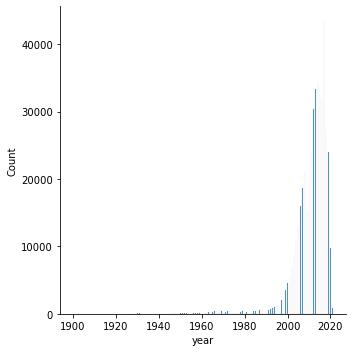

In [71]:
plt.figure(figsize = (8,8))
sns.displot(dfx['year']);

### Price 

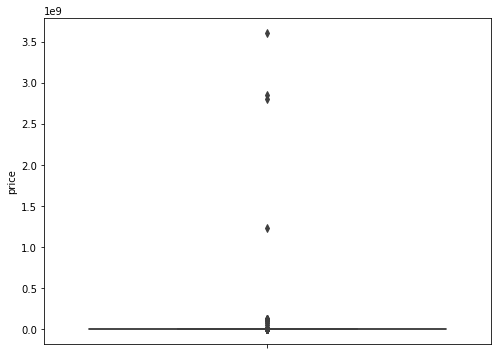

In [72]:
ax = plt.subplots(figsize = (8,6))
sns.boxplot(y = dfx['price']);

In [73]:
dfx['price'].describe()

count    4.582130e+05
mean     4.042093e+04
std      8.194599e+06
min      0.000000e+00
25%      4.900000e+03
50%      1.099500e+04
75%      2.149500e+04
max      3.615215e+09
Name: price, dtype: float64

Some crazy person, mistyped the price or either want to scam the buyer with 3 billion car price. Usually the car's price ranges upto 1 0r 2 million. We will filter the overpriced cars

In [74]:
dfx = dfx[(dfx['price'] >= 100) & (dfx['price'] <= 100000)]

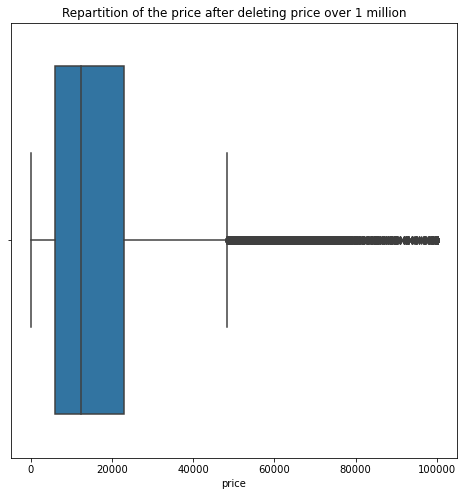

In [75]:
plt.figure(figsize = (8,8))
sns.boxplot(x = 'price', data = dfx)
plt.title("Repartition of the price after deleting price over 1 million")
plt.show();

<Figure size 576x576 with 0 Axes>

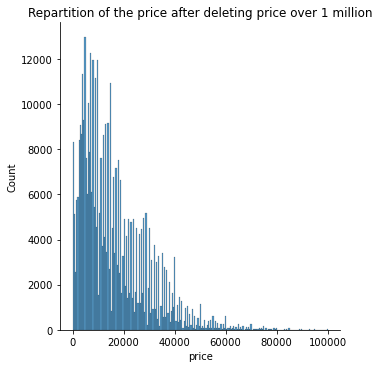

In [76]:
plt.figure(figsize = (8,8))
sns.displot(x = 'price', data = dfx);
plt.title("Repartition of the price after deleting price over 1 million")
plt.show()

### Odometer

In [77]:
dfx['odometer'].describe()

count    4.209290e+05
mean     1.037246e+05
std      3.158665e+06
min      0.000000e+00
25%      4.800000e+04
50%      1.003870e+05
75%      1.295980e+05
max      2.043756e+09
Name: odometer, dtype: float64

Since, Odometer too contains unnecessary data. In a real case sceneraio we never see a vechicle which is driven for a billion KM, which is incorrect data. Usually, a car with driven more than 100,000 Km no one would be willing to buy that car. So we will be selecting the odometer from 500 Km - 500,000 KM. 

In [78]:
dfx = dfx[(dfx['odometer'] >= 500) & (dfx['odometer'] <= 500000)]

<Figure size 576x576 with 0 Axes>

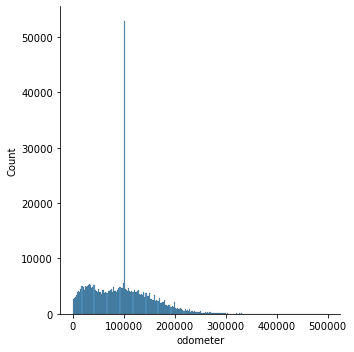

In [79]:
plt.figure(figsize = (8,8))
sns.displot(dfx['odometer']);

In [80]:
dfx.describe()

,Unnamed: 0,id,price,year,odometer
count,412627.000000,4.126270e+05,412627.000000,412627.000000,412627.000000
mean,228320.299035,7.235242e+09,15928.156279,2010.593432,97000.823191
std,132094.596317,4.592402e+06,12916.896967,8.750108,58094.037624
min,0.000000,7.208550e+09,100.000000,1900.000000,500.000000
25%,114141.500000,7.231974e+09,5999.000000,2008.000000,50745.000000
50%,226400.000000,7.236420e+09,12500.000000,2013.000000,101669.756941
75%,342731.500000,7.239327e+09,22900.000000,2016.000000,130000.000000
max,458212.000000,7.241019e+09,100000.000000,2021.000000,500000.000000


# Feature Engineering

In [81]:
dfx.head()

,Unnamed: 0,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color,state
0,0,7240372487,auburn,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,other,rwd,full-size,other,white,al
1,1,7240309422,auburn,7500,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,automatic,fwd,full-size,sedan,white,al
2,2,7240224296,auburn,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,automatic,4wd,full-size,SUV,blue,al
3,3,7240103965,auburn,2000,1974.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,automatic,rwd,full-size,pickup,blue,al
4,4,7239983776,auburn,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,automatic,4wd,full-size,pickup,blue,al


<b> We have car year, when the car was bought so according to this we can create new feature car_age </b>

In [82]:
## First of all changing float year i.e (2010.0) to integer (2010)

yrs = [int(year) for year in dfx['year']]

In [83]:
dfx['year'] = yrs

In [84]:
dfx.head()

,Unnamed: 0,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color,state
0,0,7240372487,auburn,35990,2010,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,other,rwd,full-size,other,white,al
1,1,7240309422,auburn,7500,2014,hyundai,sonata,excellent,4 cylinders,gas,93600.0,automatic,fwd,full-size,sedan,white,al
2,2,7240224296,auburn,4900,2006,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,automatic,4wd,full-size,SUV,blue,al
3,3,7240103965,auburn,2000,1974,chevrolet,c-10,good,4 cylinders,gas,190000.0,automatic,rwd,full-size,pickup,blue,al
4,4,7239983776,auburn,19500,2005,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,automatic,4wd,full-size,pickup,blue,al


In [85]:
dfx['car_age'] = 2021 - dfx['year']

In [86]:
dfx.head()

,Unnamed: 0,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color,state,car_age
0,0,7240372487,auburn,35990,2010,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,other,rwd,full-size,other,white,al,11
1,1,7240309422,auburn,7500,2014,hyundai,sonata,excellent,4 cylinders,gas,93600.0,automatic,fwd,full-size,sedan,white,al,7
2,2,7240224296,auburn,4900,2006,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,automatic,4wd,full-size,SUV,blue,al,15
3,3,7240103965,auburn,2000,1974,chevrolet,c-10,good,4 cylinders,gas,190000.0,automatic,rwd,full-size,pickup,blue,al,47
4,4,7239983776,auburn,19500,2005,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,automatic,4wd,full-size,pickup,blue,al,16


<b> Dropping year column </b>

In [87]:
dfx = dfx.drop(['year'], axis = 1)

<b> Removing text 'cylinders' from column cylinders and  </b> [eg: it is given 8 cylinders, we will make it 8]

In [88]:
dfx['cylinders'].value_counts()

6 cylinders     246985
4 cylinders      87602
8 cylinders      73438
5 cylinders       1979
10 cylinders      1133
other              874
3 cylinders        467
12 cylinders       149
Name: cylinders, dtype: int64

<b> Since there are 874 other cylinders which is unusefull, so replacing other with 6 cylinders as majority of 6 cylinders engine capacity car is sold </b>

In [89]:
dfx['cylinders'] = [cylinders.replace('other','6') for cylinders in dfx['cylinders']]

In [90]:
dfx['cylinders'].value_counts()

6 cylinders     246985
4 cylinders      87602
8 cylinders      73438
5 cylinders       1979
10 cylinders      1133
6                  874
3 cylinders        467
12 cylinders       149
Name: cylinders, dtype: int64

In [91]:
dfx['cylinders'] = [cylinders.replace('cylinders','') for cylinders in dfx['cylinders']]

In [92]:
dfx['cylinders'].value_counts()

6      246985
4       87602
8       73438
5        1979
10       1133
6         874
3         467
12        149
Name: cylinders, dtype: int64

In [93]:
## Changing cylinders from string to integer

In [94]:
dfx['cylinders'] = [int(cylinders) for cylinders in dfx['cylinders']]

In [95]:
dfx['cylinders'].value_counts()

6     247859
4      87602
8      73438
5       1979
10      1133
3        467
12       149
Name: cylinders, dtype: int64

In [96]:
dfx.head()

,Unnamed: 0,id,region,price,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color,state,car_age
0,0,7240372487,auburn,35990,chevrolet,corvette grand sport,good,8,gas,32742.0,other,rwd,full-size,other,white,al,11
1,1,7240309422,auburn,7500,hyundai,sonata,excellent,4,gas,93600.0,automatic,fwd,full-size,sedan,white,al,7
2,2,7240224296,auburn,4900,bmw,x3 3.0i,good,6,gas,87046.0,automatic,4wd,full-size,SUV,blue,al,15
3,3,7240103965,auburn,2000,chevrolet,c-10,good,4,gas,190000.0,automatic,rwd,full-size,pickup,blue,al,47
4,4,7239983776,auburn,19500,ford,f350 lariat,excellent,8,diesel,116000.0,automatic,4wd,full-size,pickup,blue,al,16


### Condition

In [97]:
dfx['condition'].value_counts()

good         276583
excellent    105023
like new      22085
fair           7446
new             896
salvage         594
Name: condition, dtype: int64

In [98]:
## Eyeing on Condition we get to see 6 different categories. Let's set our own categories
## Ranking from Excellent, Good, and Salvage

In [99]:
dfx['condition'] = [ condition.replace('like new','excellent') for condition in dfx['condition']]

In [100]:
dfx['condition'] = [condition.replace('fair','good') for condition in dfx['condition']]

In [101]:
dfx['condition'] = [condition.replace('new','excellent') for condition in dfx['condition']]

In [102]:
dfx['condition'].value_counts()

good         284029
excellent    128004
salvage         594
Name: condition, dtype: int64

In [103]:
dfx['fuel'].value_counts()

gas         365339
diesel       26523
other        13335
hybrid        5276
electric      2154
Name: fuel, dtype: int64

Since we don't know what is the other type of fuel they are mentioning. Other might be either hybrid or electric. We will set is as hybrid car.

In [104]:
dfx['fuel'] = [fuel.replace('other','hybrid') for fuel in dfx['fuel']]

In [105]:
dfx['fuel'].value_counts()

gas         365339
diesel       26523
hybrid       18611
electric      2154
Name: fuel, dtype: int64

### Transmission

In [106]:
dfx['transmission'].value_counts()

automatic    357802
other         29972
manual        24853
Name: transmission, dtype: int64

### Drive

In [107]:
dfx['drive'].value_counts()

4wd    244520
fwd    111584
rwd     56523
Name: drive, dtype: int64

### Size

In [108]:
dfx['size'].value_counts()

full-size      352361
mid-size        37798
compact         19422
sub-compact      3046
Name: size, dtype: int64

### Type

In [109]:
dfx['type'].value_counts()

sedan          184269
SUV             72113
pickup          40553
truck           30140
other           21187
coupe           17642
hatchback       15215
wagon            9543
van              8578
convertible      6339
mini-van         5877
offroad           600
bus               571
Name: type, dtype: int64

### PaintColor

In [110]:
dfx['paint_color'].value_counts()

white     197032
black      58510
silver     42816
red        30870
blue       30122
grey       27934
custom      8334
green       7079
brown       5608
orange      1798
yellow      1796
purple       728
Name: paint_color, dtype: int64

# Data Visualiazation

Let's get deep with the data

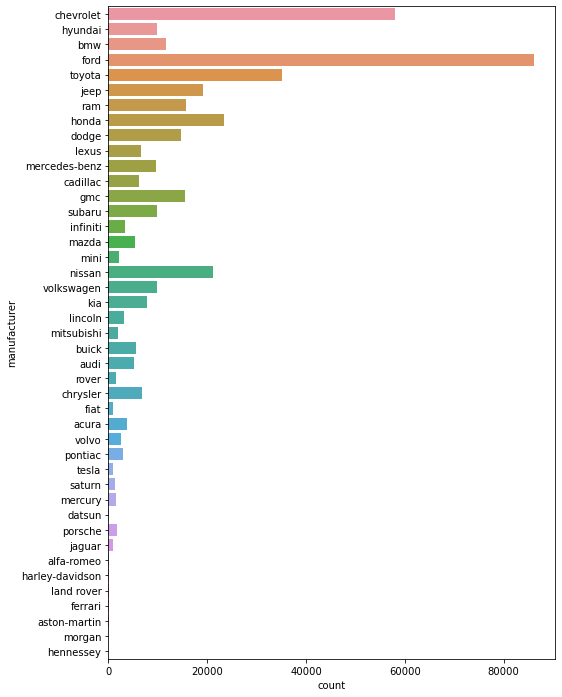

In [111]:
plt.figure(figsize = (8,12))
sns.countplot(y = 'manufacturer', data = dfx);

In [112]:
dfx['manufacturer'].value_counts()

ford               86081
chevrolet          58013
toyota             35121
honda              23462
nissan             21077
jeep               19245
ram                15766
gmc                15593
dodge              14704
bmw                11578
subaru              9894
volkswagen          9890
hyundai             9871
mercedes-benz       9590
kia                 7904
chrysler            6748
lexus               6603
cadillac            6246
buick               5519
mazda               5474
audi                5151
acura               3670
infiniti            3345
lincoln             3072
pontiac             2851
volvo               2602
mini                2232
mitsubishi          1914
porsche             1654
mercury             1569
rover               1540
saturn              1315
tesla               1017
jaguar               987
fiat                 886
alfa-romeo           173
harley-davidson      135
datsun                59
aston-martin          26
ferrari               26


<b> As we can see, the top 10 most selling brand are : </b>
- Ford
- Chevrolet
- Toyota
- Honda
- Nissan
- Jeep
- Ram
- GMC
- Dodge
- BMW

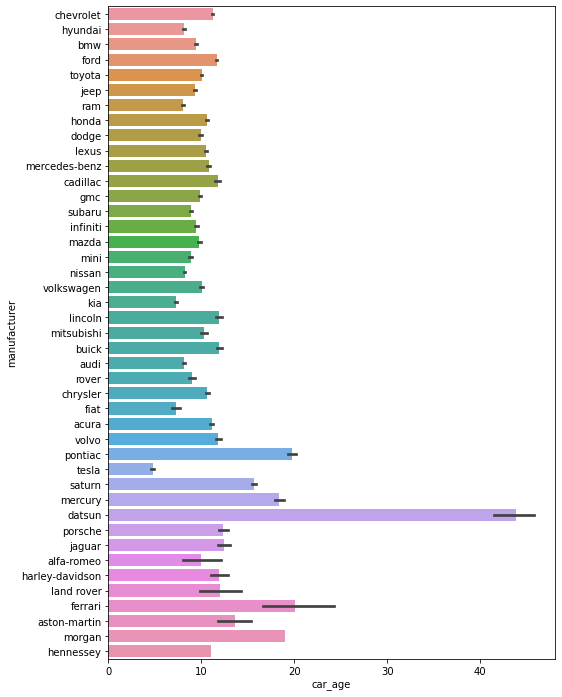

In [113]:
plt.figure(figsize = (8,12))
sns.barplot(x = 'car_age', y ='manufacturer', data = dfx);

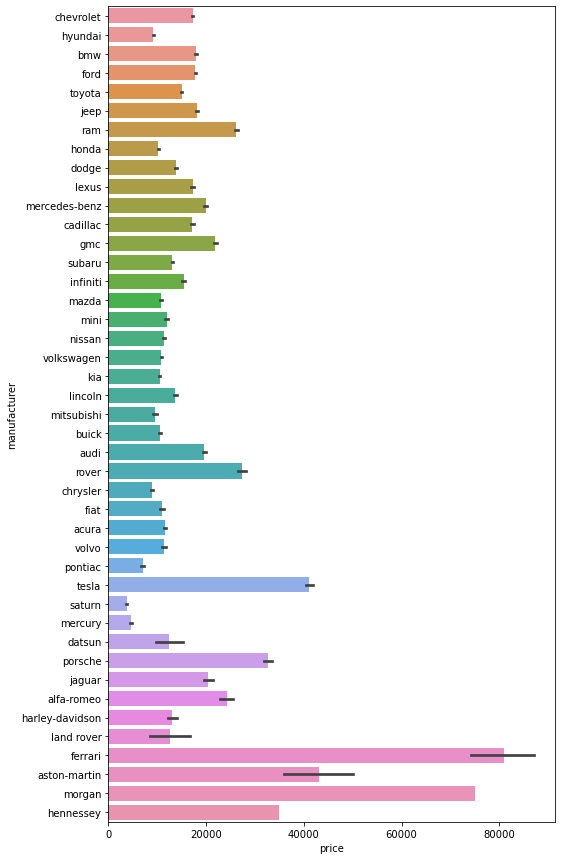

In [114]:
plt.figure(figsize = (8,15))
sns.barplot(y = 'manufacturer', x = 'price', data = dfx);

From the above visualiazation, we can see the higher error bars in ferrari, aston-martin, land rover. Since these are the premium vechicles. Usually people tend to sell their cars on higher margin.

And we can see, the most expensive cars are:
- ferrari
- aston-martin
- morgan
- hennessey
- tesla
- rover
- jaguar
    

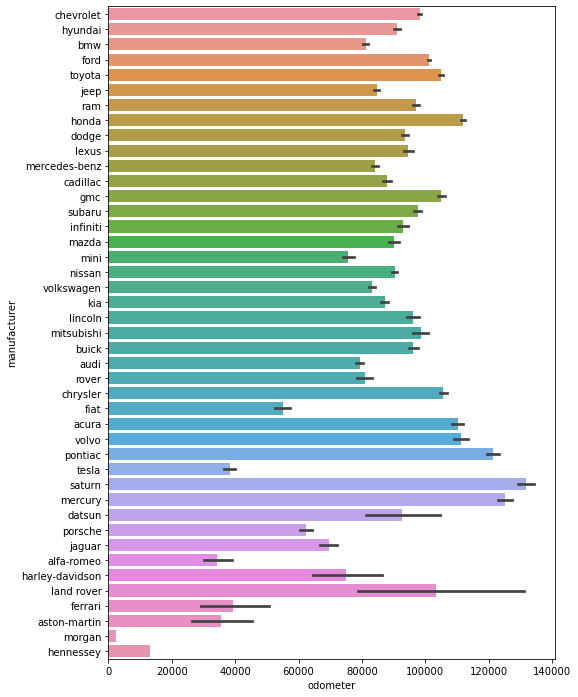

In [115]:
plt.figure(figsize = (8,12))
sns.barplot(x = 'odometer', y = 'manufacturer', data = dfx);

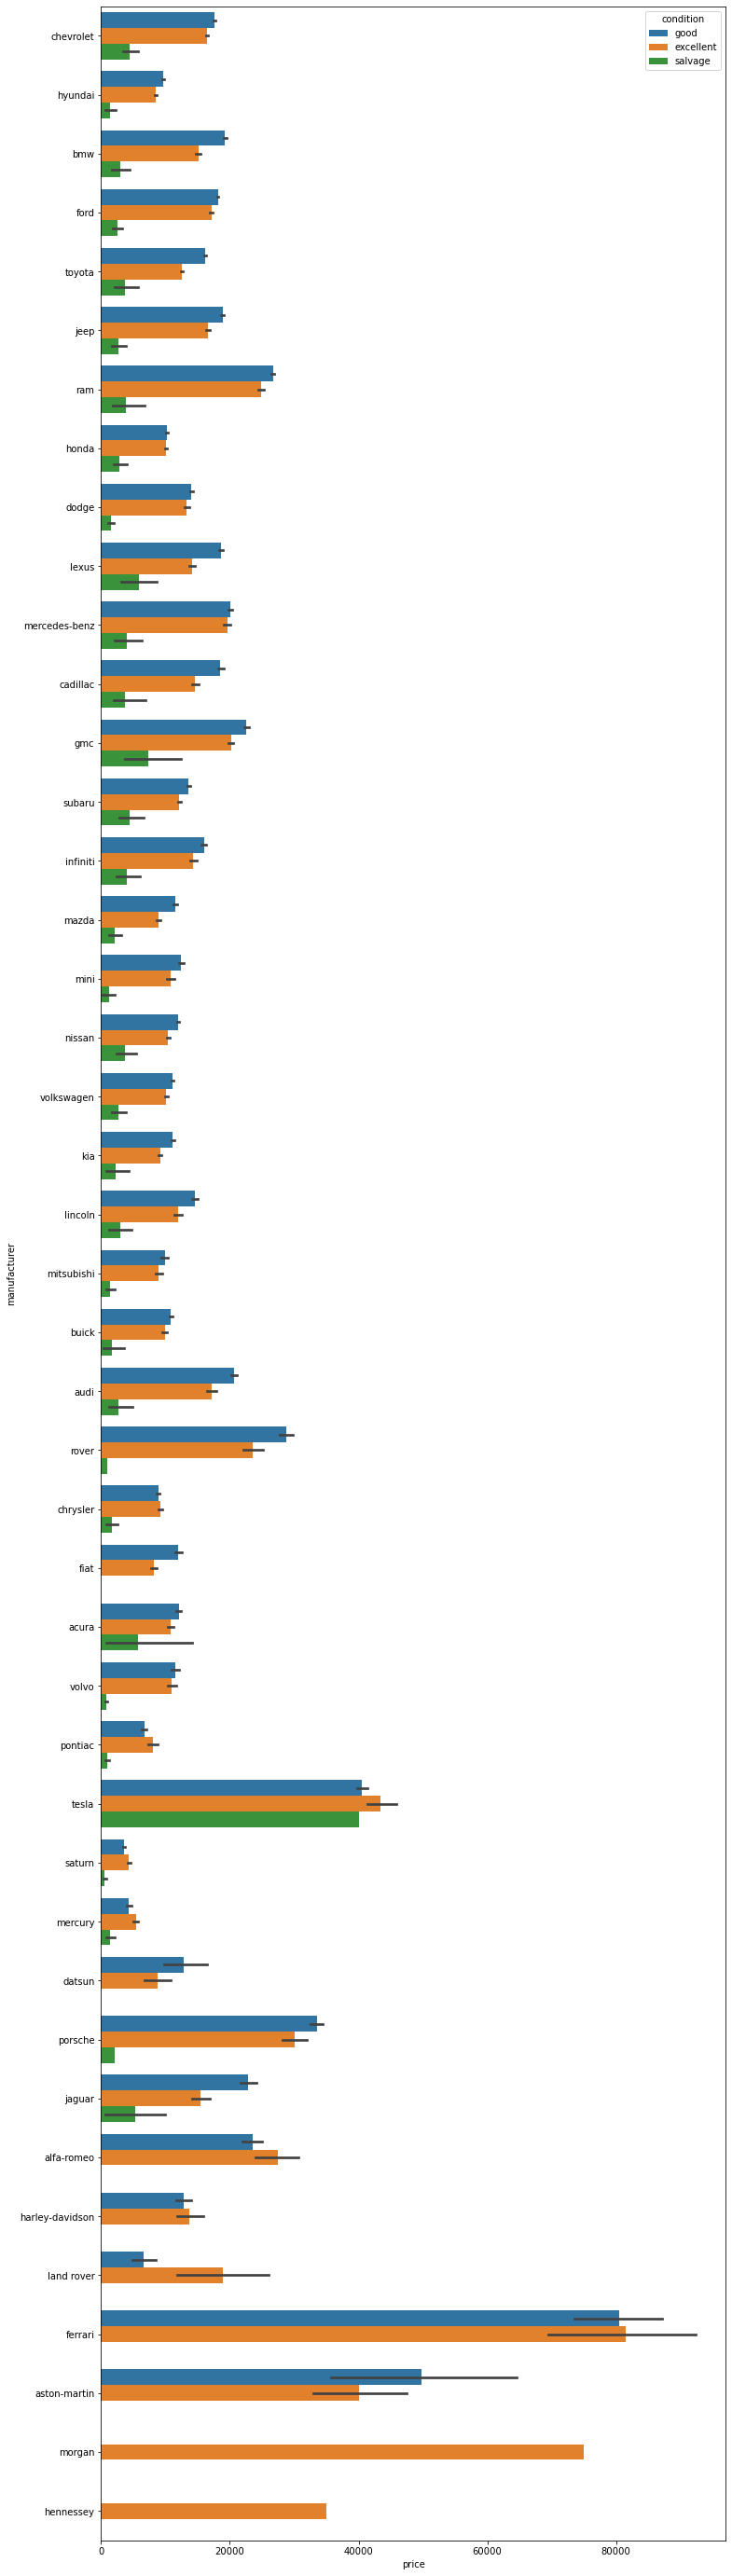

In [116]:
plt.figure(figsize = (12,50))
sns.barplot(x = 'price', y = 'manufacturer', hue = 'condition', data = dfx);

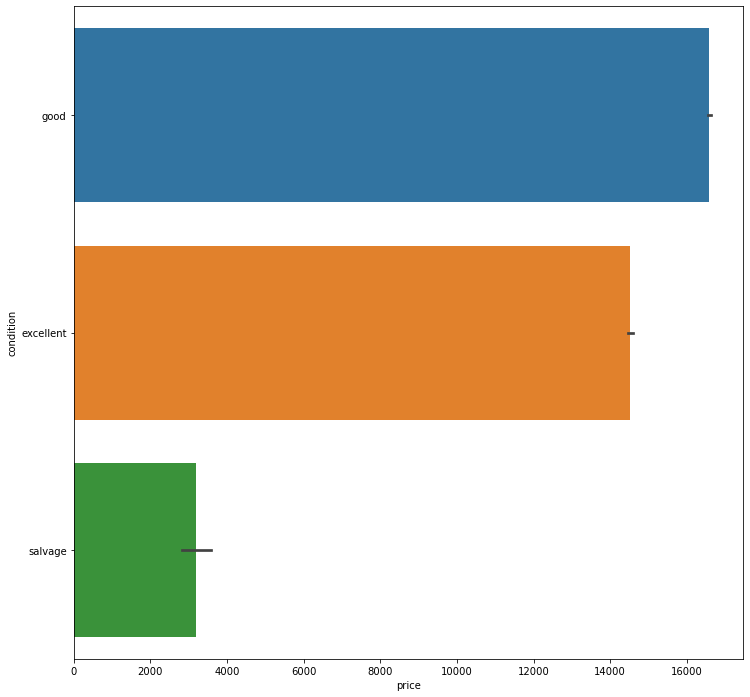

In [117]:
plt.figure(figsize = (12,12))
sns.barplot(x= 'price', y = 'condition', data = dfx);

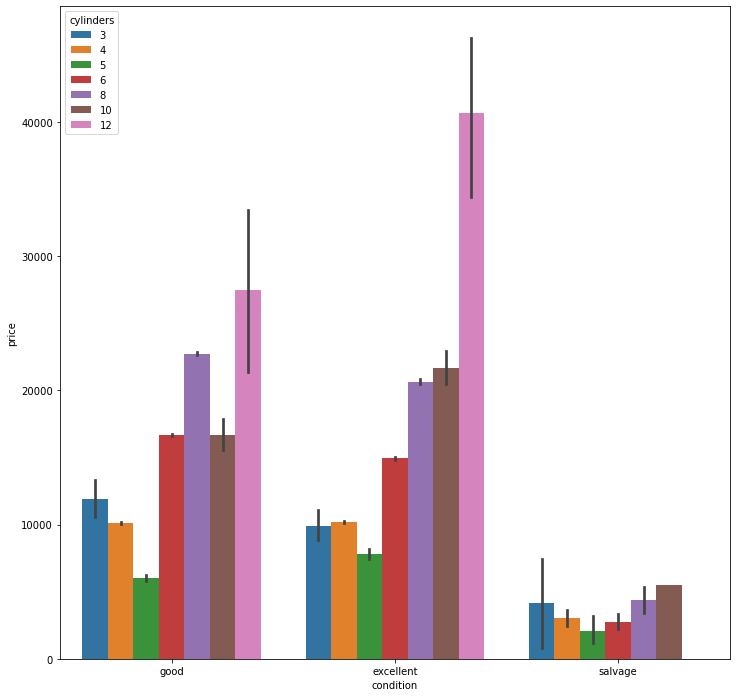

In [118]:
plt.figure(figsize = (12,12))
sns.barplot(y= 'price', x = 'condition', hue= 'cylinders',data = dfx);

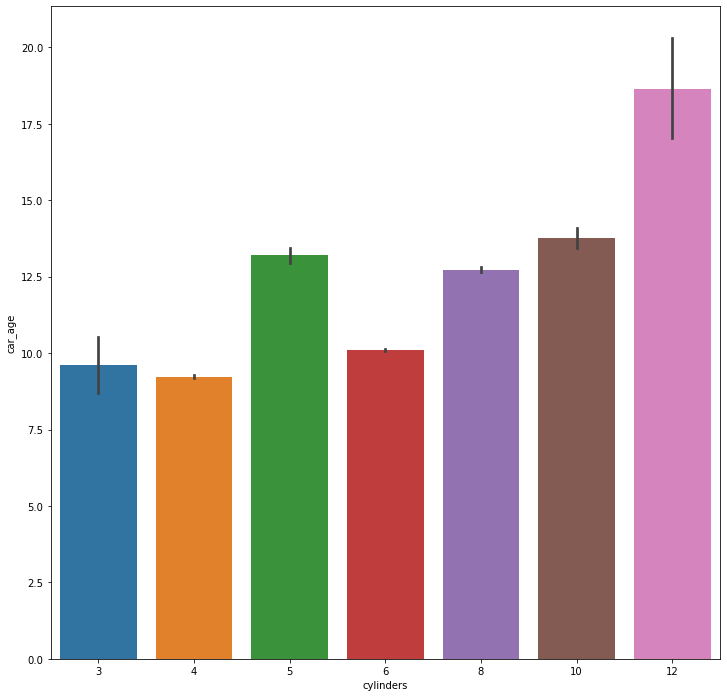

In [119]:
plt.figure(figsize = (12,12))
sns.barplot(y= 'car_age', x = 'cylinders', data = dfx);

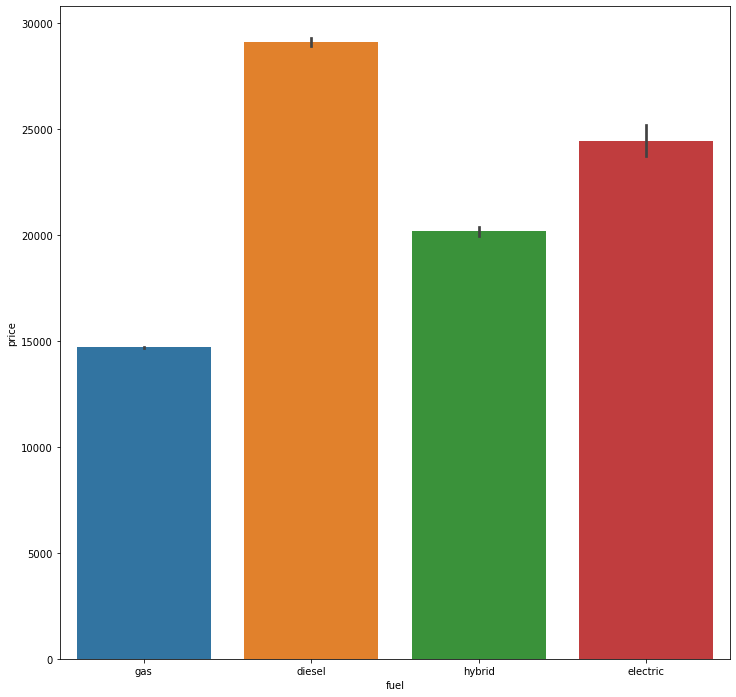

In [120]:
plt.figure(figsize = (12,12))
sns.barplot(y= 'price', x = 'fuel',data = dfx);

Most of the cars are Diesel type

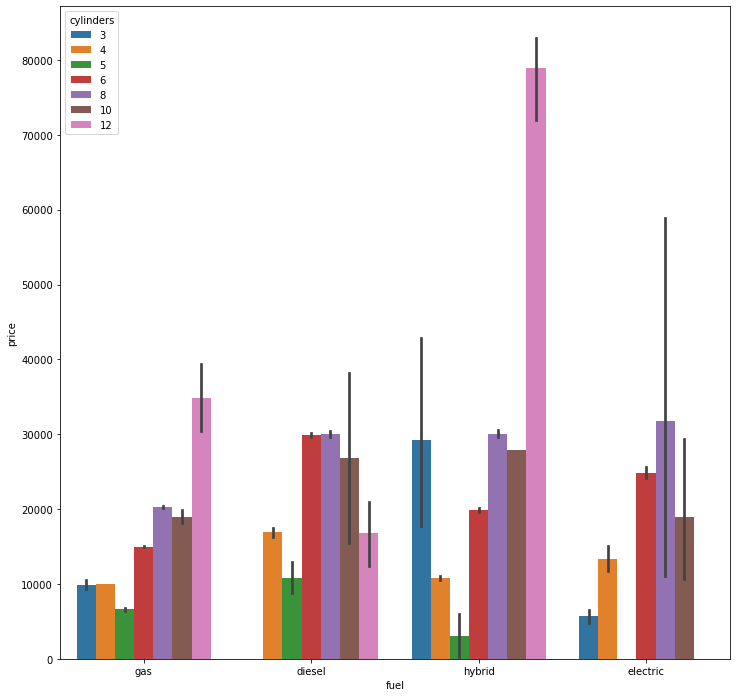

In [121]:
plt.figure(figsize = (12,12))
sns.barplot(y= 'price', x = 'fuel', hue= 'cylinders',data = dfx);

- Since diesel cars are popular among normal drivers, what they expect is average cars having 6-8 cylinders.
- While Gas or Petrol, since gasoline is far better when it comes to making horsepower, and horsepower is what dictates how fast a car will go after the initial acceleration, it only seems logical that petrol engines are used in supercars instead of diesel
- So is the same for hybrid cars
- Electric cars doesn't contains engine which is 0 cylinders. That data is totally incorrect

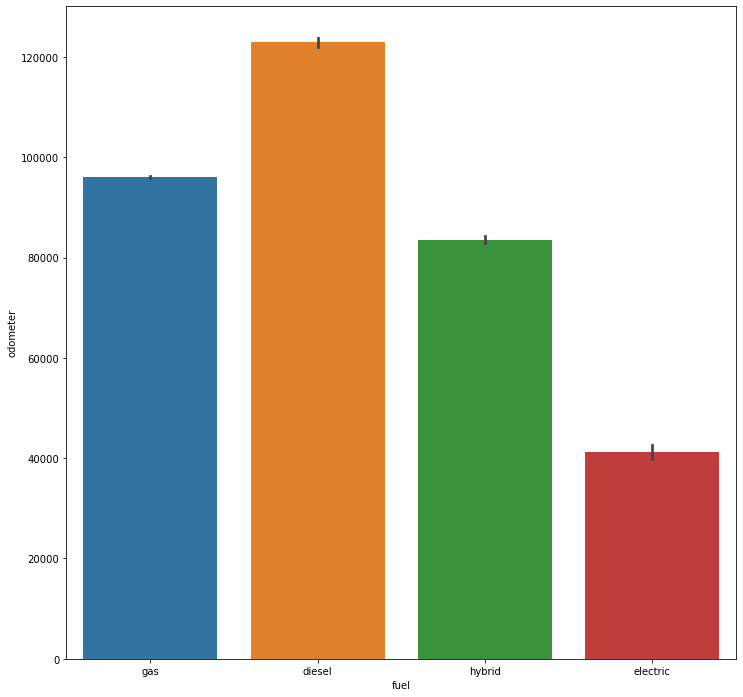

In [122]:
plt.figure(figsize = (12,12))
sns.barplot(y= 'odometer', x = 'fuel',data = dfx);

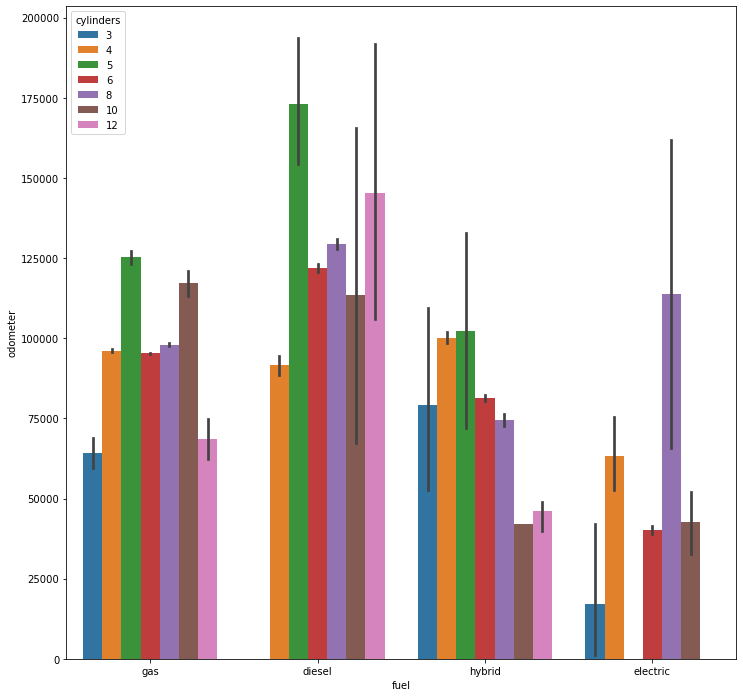

In [123]:
plt.figure(figsize = (12,12))
sns.barplot(y= 'odometer', x = 'fuel', hue= 'cylinders',data = dfx);

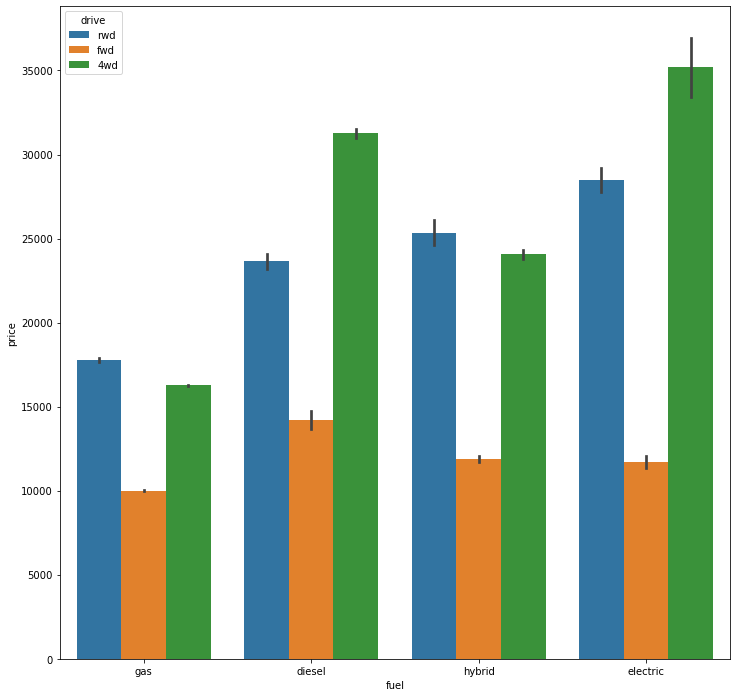

In [124]:
plt.figure(figsize = (12,12))
sns.barplot(y= 'price', x = 'fuel', hue= 'drive',data = dfx);

- Gas option: RWD (Rear Wheel Drive) has the highest sales
- Diesel option: 4WD (Four WHeel Drive) is the popular one
- Hybrid option: RWD (Rear Wheel Drive) has the highest sales
- Electric option: 4WD (Four Wheel Drive) 

Observing this data, we can see fwd (front wheel drive) is not popular. It has significantly lower number of sales

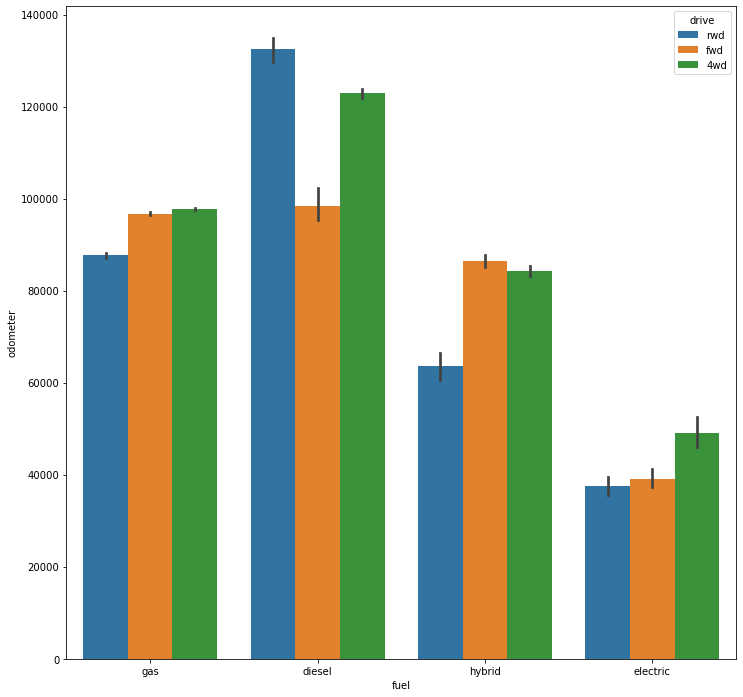

In [125]:
plt.figure(figsize = (12,12))
sns.barplot(y= 'odometer', x = 'fuel', hue= 'drive',data = dfx);

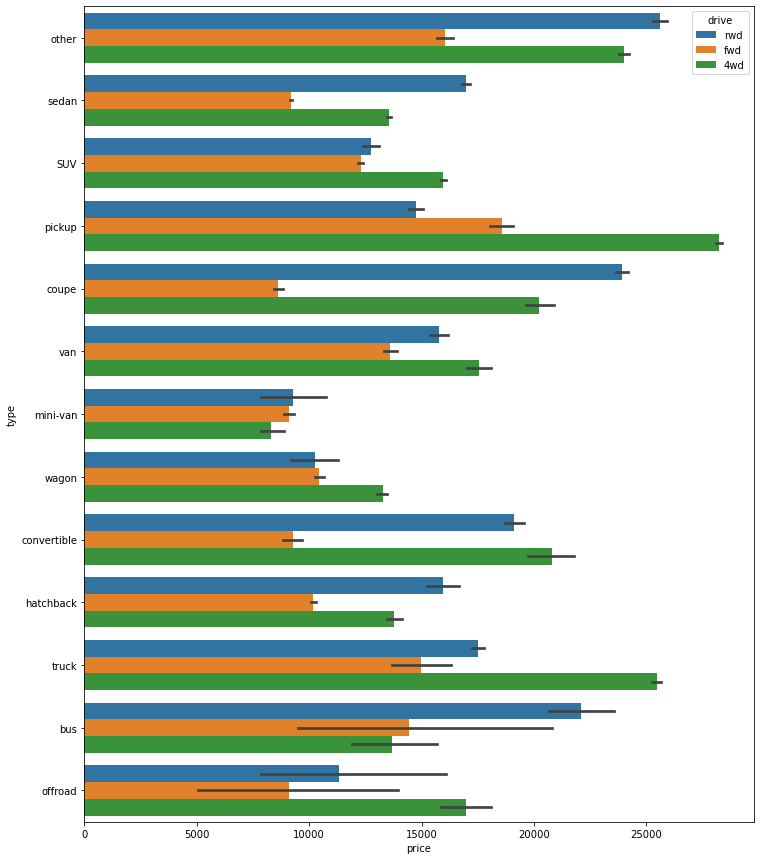

In [126]:
plt.figure(figsize = (12,15))
sns.barplot(x = 'price', y = 'type', hue= 'drive',data = dfx);

- SUV & Offroad & Pickup, buying a SUV or Offroad with RWD or FWD is not worth, so most of the people so for 4WD
- Similaly, Truck, VAN & Wagon too needs more power, so most of the people prefer 4WD (Four Wheel Drive)
- However, amazingly the highest seller for BUS is RWD
- Sedan, Coupe, Hatchback they are cities cars so RWD is fine for them.


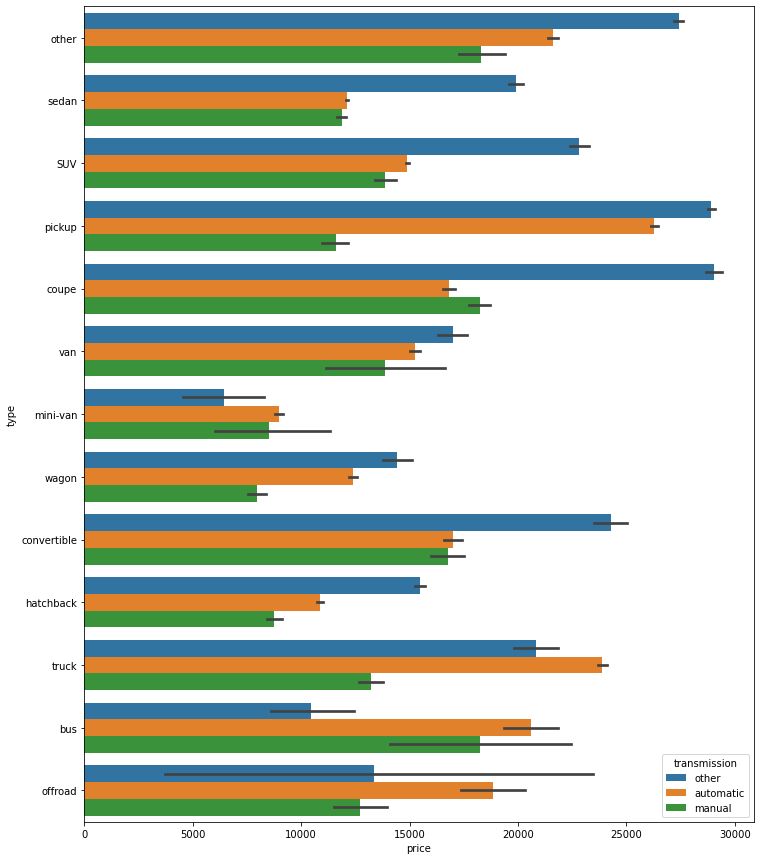

In [127]:
plt.figure(figsize = (12,15))
sns.barplot(x = 'price', y = 'type', hue= 'transmission',data = dfx);

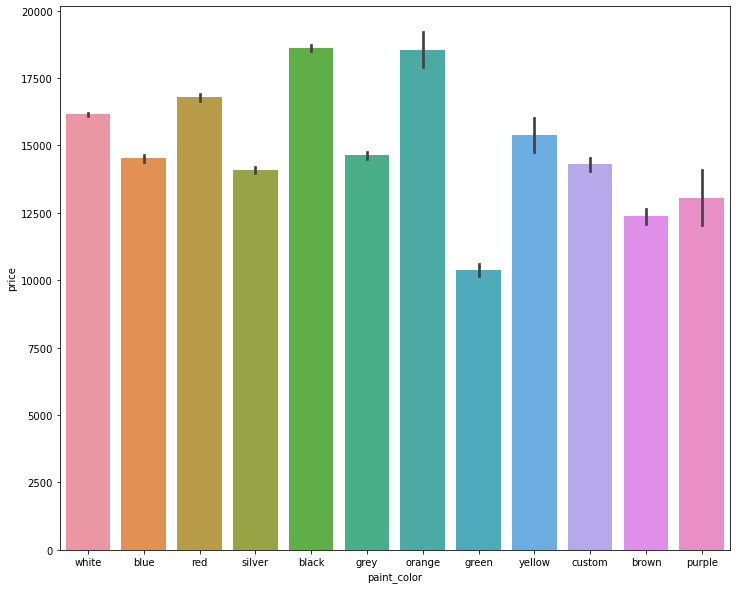

In [128]:
plt.figure(figsize = (12,10))
sns.barplot(y = 'price', x = 'paint_color',data = dfx);

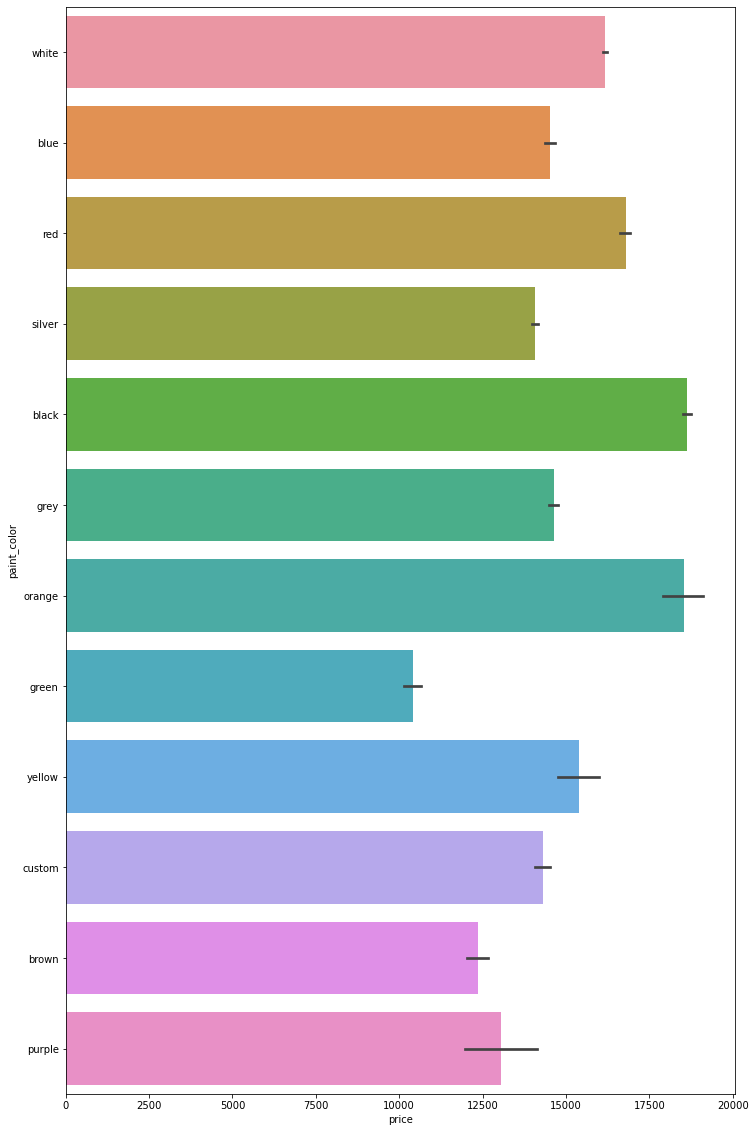

In [129]:
plt.figure(figsize = (12,20))
sns.barplot(x = 'price', y = 'paint_color',data = dfx);

Since, we are predicting the price it is a regression type

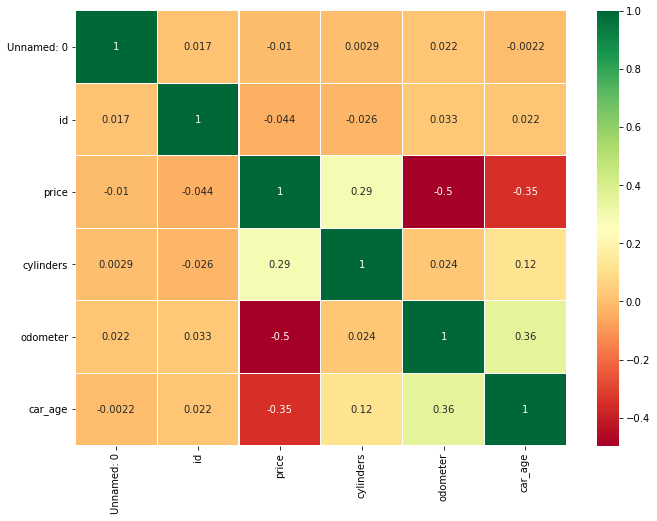

In [130]:
sns.heatmap(dfx.corr(method='pearson'),annot=True, cmap='RdYlGn', linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(11,8)
plt.show()